# Audio samples preprocessing

In [1]:
import math
import os
import warnings

import librosa
import librosa.display
import matplotlib_inline.backend_inline
import numpy as np
from matplotlib import pyplot as plt

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
warnings.filterwarnings("ignore")

### Load an audio file

4 samples ("sample1.wav", "sample2.wav", "sample3.wav", "sample4.wav") are provided in the `data/` folder.

In [2]:
sample_file = os.path.join(os.getcwd(), "data", "sample1.wav")
sample_waveform, sample_rate = librosa.load(sample_file, sr=None)
print(
    f"{round(len(sample_waveform) / sample_rate, 2)} second audio "
    + f"that consists of {len(sample_waveform)} values at {sample_rate} sample rate"
)

15.46 second audio that consists of 682000 values at 44100 sample rate


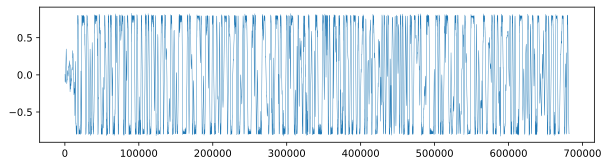

In [3]:
plt.figure(figsize=(10, 2.5))
plt.plot(sample_waveform, linewidth=0.4)
plt.show()

---

## Trim and normalize the audio

- First trim 2 seconds from the start and the end of the audio.
- Then clip all amplitude values in the audio that are further than `MAX_DEVIATIONS * standard_deviation` from the mean. 
- Finally normalize the amplitude values by mapping them to [-1:1] range. 


For convenient use in notebooks this logic is implemented in `breathe.audio_utils.trim_and_norm()` function

In [4]:
from breathe.audio_utils import trim_and_norm

In [5]:
norm_clipped_waveform = trim_and_norm(
    sample_waveform=sample_waveform, sample_rate=sample_rate
)
sample_time_space = np.divide(range(len(sample_waveform)), sample_rate)

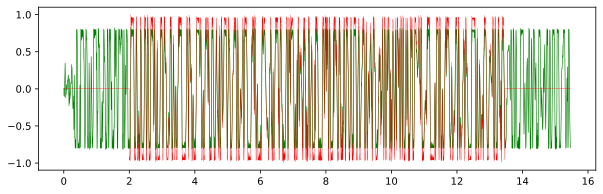

In [6]:
plt.figure(figsize=(10, 3))
pad = int((len(sample_waveform) - len(norm_clipped_waveform)) / 2)
plt.plot(sample_time_space, sample_waveform, linewidth=0.6, color="green")
plt.plot(
    sample_time_space,
    np.pad(norm_clipped_waveform, (pad, pad)),
    linewidth=0.3,
    color="red",
)
plt.show()

---

## Divide the audio into 5 second clips


For convenient use notebooks this logic is implemented in `breathe.audio_utils.get_5sec_clips()` function

In [7]:
from breathe.audio_utils import get_5sec_clips

In [8]:
clips = get_5sec_clips(norm_clipped_waveform, sample_rate)
clip_count = len(clips)

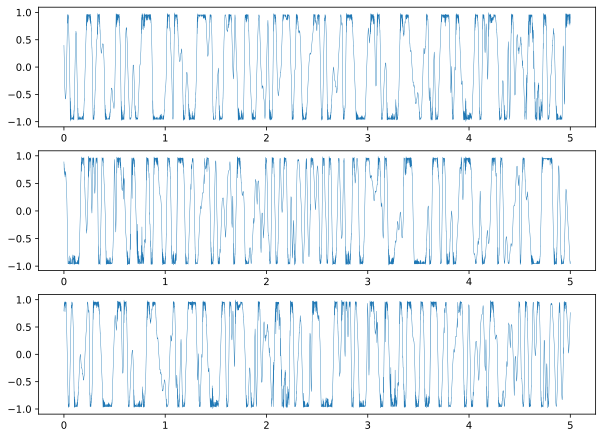

In [9]:
fig, ax = plt.subplots(clip_count, figsize=(10, clip_count * 2.5))
for i in range(clip_count):
    ax[i].plot(np.divide(range(len(clips[i])), sample_rate), clips[i], linewidth=0.4)
plt.show()

---

## Generate spectrograms from clips

Generate 3 spectrograms of mel-frequency cepstral coefficients calculated with different width of a running window using discrete Fourier transformation.

For convenient use notebooks this logic is implemented in `breathe.audio_utils.extract_specs_for_clip()` function

In [10]:
from breathe.audio_utils import extract_specs_for_clip

In [11]:
clip = clips[-1]  # Display spectrograms only for one clip
clip_tensor, spectrograms = extract_specs_for_clip(clip=clip, sampling_rate=sample_rate)

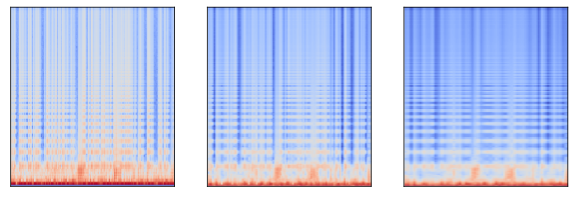

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.3))
for i, ax in enumerate(fig.axes):
    librosa.display.specshow(spectrograms[i], ax=ax)
plt.show()